In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import Axes3D
from sklearn import mixture
%matplotlib inline

In [2]:
def GMM_sample(n_samples, W, mu, sigma, d):
    categories = np.random.multinomial(n_samples,W,1)
    samples = []
    for category in range(len(categories[0])):
        a_sample = np.random.multivariate_normal(mu[category],sigma[category],categories[0][category])
        samples.extend(a_sample)
        
    return samples


    
    

In [3]:
sigma_array = [2*np.identity(2),1.2*np.identity(2)]
mu_array = [[1,2],[3,4]]
samples = GMM_sample(20, [0.5,0.5], mu_array, sigma_array, 2)
# print len(GMM_sample(20, [0.5,0.5], mu_array, sigma_array, 2))

In [4]:
def q(x, y):
    g1 = mlab.bivariate_normal(x, y, 1.0, 1.0, -1, -1, -0.8)
    g2 = mlab.bivariate_normal(x, y, 1.5, 0.8, 1, 2, 0.6)
    return 0.6*g1+8.4*g2/(0.6+8.4)

In [5]:
def plot_q():
    fig = plt.figure(figsize=(15,10))
    ax = fig.gca(projection="3d")
    X = np.arange(-5, 5, 0.1)
    Y = np.arange(-5, 5, 0.1)
    X, Y = np.meshgrid(X, Y)
    Z = q(X, Y)
    surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=plt.get_cmap('coolwarm'),
            linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()
    plt.clf()

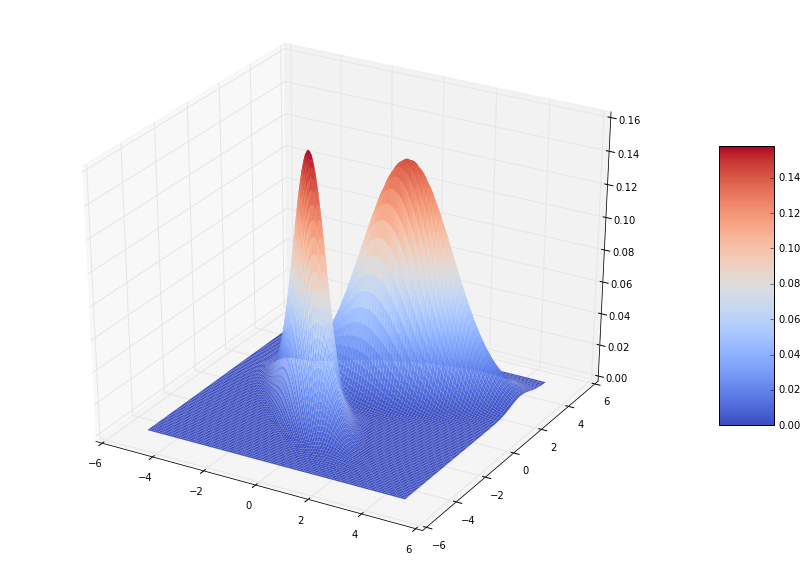

In [6]:
plot_q()

In [140]:
def sample():
    '''Metropolis Hastings'''
    N = 10000
    s = 10
    r = np.zeros(2)
    p = q(r[0], r[1])
    print p
    samples = []
    for i in xrange(N):
        rn = r + np.random.normal(size=2)
        pn = q(rn[0], rn[1])
        if pn >= p:
            p = pn
            r = rn
        else:
            u = np.random.rand()
            if u < pn/p:
                p = pn
                r = rn
        if i % s == 0:
            samples.append(r)

    samples = np.array(samples)
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, s=1)

    '''Plot target'''
    dx = 0.01
    x = np.arange(np.min(samples), np.max(samples), dx)
    y = np.arange(np.min(samples), np.max(samples), dx)
    X, Y = np.meshgrid(x, y)
    Z = q(X, Y)
    CS = plt.contour(X, Y, Z, 10, alpha=0.5)
    plt.clabel(CS, inline=1, fontsize=10)
    plt.savefig("samples.png")
    return samples

In [145]:

from sklearn import mixture

def fit_samples(samples):
    ti
    print gmix.means_
    colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
#     fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colors, alpha=0.8)
    plt.show()

In [155]:
def fit_samples1(samples):
    gmix = mixture.GMM(n_components=4, covariance_type='full')
    gmix.fit(samples)
    print gmix.means_
    colors = []
    for i in gmix.predict(samples):
        if i == 0:
            colors.append('r')
        elif i == 1:
            colors.append('g')
        elif i == 2:
            colors.append('b')
        elif i == 3:
            colors.append('orange')
#     colors = ['r' if i==0 else 'g' for i in gmix.predict(samples)]
#     fig = plt.figure(figsize=(15,10))
    ax = plt.gca()
    ax.scatter(samples[:,0], samples[:,1], c=colors, alpha=0.8)
    plt.show()

[[ 3.25835181  2.74490926]
 [-0.73717151  2.16863192]
 [ 2.03910411  4.16758535]
 [ 3.55829931  5.7453525 ]]


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

TypeError: list indices must be integers, not tuple

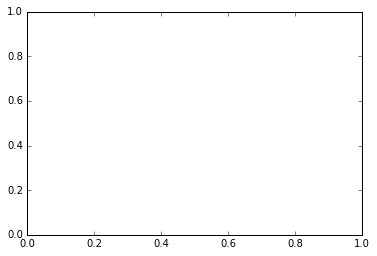

In [156]:
fit_samples1(samples)

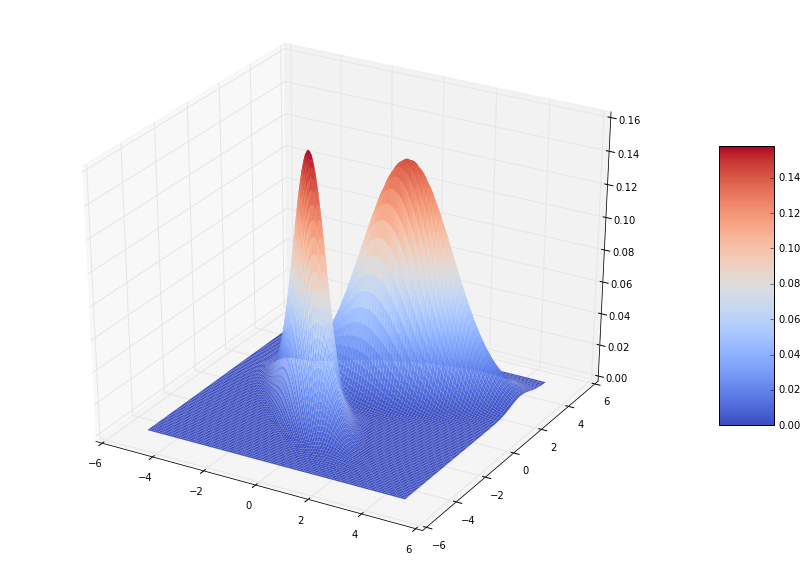

0.00607795596189


/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

[[-1.02556111 -0.98581626]
 [ 1.08877756  2.03535351]]


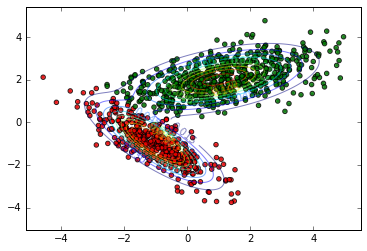

In [157]:
if __name__ == '__main__':
    plot_q()
    s = sample()
    fit_samples(s)

/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/alng/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:75:

[[ 0.61378892  1.99467415]
 [-0.96131135 -1.08496897]
 [ 1.96527941  2.21292429]
 [-1.32107295  0.75451667]]


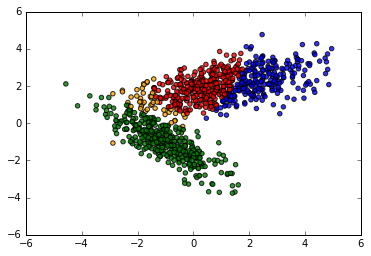

In [158]:
fit_samples1(s)